In [36]:
import sys
sys.path.append("../../RL-book")
from dataclasses import dataclass
from typing import Tuple, Dict
from rl.markov_decision_process import FiniteMarkovDecisionProcess, MarkovDecisionProcess
from rl.markov_decision_process import FinitePolicy, StateActionMapping
from rl.markov_process import FiniteMarkovProcess, FiniteMarkovRewardProcess
from rl.distribution import Categorical, Constant
from scipy.stats import poisson
import numpy as np
from more_itertools import distinct_permutations
import matplotlib.pyplot as plt
from rl.dynamic_programming import value_iteration, policy_iteration

In [37]:
@dataclass(frozen=True)
class Frog_State:
    '''This class is the lilypad that the frog is on'''
    
    position: int
        
FrogMapping = StateActionMapping[Frog_State, int]

In [38]:
class Frog_MDP_Finite(FiniteMarkovDecisionProcess[Frog_State, int]):
    def __init__(self,num_lily_pads:int):
        self.num_lily_pads = num_lily_pads
        super().__init__(self.get_action_transition_reward_map())
    
    def get_action_transition_reward_map(self) -> FrogMapping:
        d: Dict[InventoryState, Dict[int, Categorical[Tuple[InventoryState,float]]]] = {}
        #{State:{Action 1:{(Next_State,Reward):Probability},{Action 2:{(Next_State,Reward):Probability}}}}

        NUM_LILIY_PADS = self.num_lily_pads
        #For each of the Lily Pads that are non terminal...
        for i in range(1,NUM_LILIY_PADS):
            action_dict = {}
            for action in range(0,2):

                if action ==0:                                              #A Croak
                    prob_dict = {}
                    upstep_prob = (NUM_LILIY_PADS-i)/NUM_LILIY_PADS
                    downstep_prob = i/NUM_LILIY_PADS
                    
                    #Choose Reward
                    if i + 1 == NUM_LILIY_PADS:
                        up_reward = 1
                        down_reward =0
                    else:
                        up_reward = 0
                        down_reward = 0

                    #Once an action is taken declare possible movements with probabilities.
                    prob_dict[(Frog_State(position=i+1),up_reward)] = upstep_prob
                    prob_dict[(Frog_State(position=i-1),down_reward)] = downstep_prob

                    #Pair all outcomes to one action:
                    action_dict[action] = Categorical(prob_dict)



                elif action ==1:                                            #B Croak
                    prob_dict = {}
                    move_prob = 1/NUM_LILIY_PADS
                    for j in range(0,NUM_LILIY_PADS+1):
                        if i != j:
                            if j == NUM_LILIY_PADS:
                                reward = 1
                            else:
                                reward = 0

                            #Once an action is taken loop through all the possible movements is can now undergo
                            prob_dict[(Frog_State(position=j),reward)] = move_prob

                    #link movements to action
                    action_dict[action] =Categorical(prob_dict)

            #Pair all actions to an initial state
            d[Frog_State(position=i)] = action_dict

        #Terminal States
        d[Frog_State(position=0)] = None
        d[Frog_State(position=NUM_LILIY_PADS)] = None

        return d

In [39]:
Policies = policy_iteration(Frog_MDP_Finite(10),1)

In [40]:
for i,policy in enumerate(Policies):
    if i > 6:
        break
    else:
        print (policy)

({Frog_State(position=1): 0.0, Frog_State(position=2): 0.0, Frog_State(position=3): 0.0, Frog_State(position=4): 0.0, Frog_State(position=5): 0.0, Frog_State(position=6): 0.0, Frog_State(position=7): 0.0, Frog_State(position=8): 0.0, Frog_State(position=9): 0.0}, For State Frog_State(position=1):
  Do Action 0 with Probability 0.500
  Do Action 1 with Probability 0.500
For State Frog_State(position=2):
  Do Action 0 with Probability 0.500
  Do Action 1 with Probability 0.500
For State Frog_State(position=3):
  Do Action 0 with Probability 0.500
  Do Action 1 with Probability 0.500
For State Frog_State(position=4):
  Do Action 0 with Probability 0.500
  Do Action 1 with Probability 0.500
For State Frog_State(position=5):
  Do Action 0 with Probability 0.500
  Do Action 1 with Probability 0.500
For State Frog_State(position=6):
  Do Action 0 with Probability 0.500
  Do Action 1 with Probability 0.500
For State Frog_State(position=7):
  Do Action 0 with Probability 0.500
  Do Action 1 wit

In [41]:
Values = value_iteration(Frog_MDP_Finite(10),1)


Iteration: 0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

Iteration: 1
0.10000000000000002
0.10000000000000002
0.10000000000000002
0.10000000000000002
0.10000000000000002
0.10000000000000002
0.10000000000000002
0.10000000000000002
0.10000000000000002

Iteration: 2
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.18000000000000005
0.19000000000000003

Iteration: 3
0.2450000000000001
0.2450000000000001
0.2450000000000001
0.2450000000000001
0.2450000000000001
0.2450000000000001
0.2450000000000001
0.2450000000000001
0.26200000000000007

Iteration: 4
0.29770000000000013
0.29770000000000013
0.29770000000000013
0.29770000000000013
0.29770000000000013
0.29770000000000013
0.29770000000000013
0.29770000000000013
0.3205000000000001

Iteration: 5
0.3404400000000002
0.3404400000000002
0.3404400000000002
0.3404400000000002
0.3404400000000002
0.3404400000000002
0.3404400000000002
0.3404400000000002
0.367930000000000

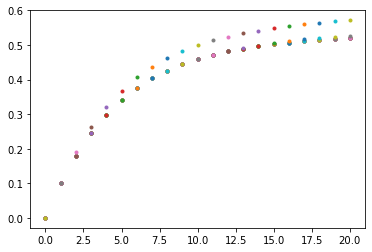

In [42]:
for i,value in enumerate(Values):
    if i > 20:
        break
    else:
        print ()
        print ("Iteration:",i)
        for state in value:
            print (value[state])
            plt.plot(i,value[state],'.')

# Problem 3: Job Hopping

Alright, this problem is quite elaborate, but let's try and break it down into something digestible. So Each day I am either employed or unempolyed. So those are the possible states that I could be in. Now the rewards of each state is going to depend on what state I am and the job that I have. Like for example if I am in state 0, then my reward is always 

**State Space:**

Let Unempolyed be state 0 and employed be state 1.

$\mathcal{S} = \{0,1\}$

Let action 0 be decline job and action 1 be accept job (Only applies to state 0)

$\mathcal{A} = \{0,1\}$


Transition Function:

$\mathcal{P}(1,s') = \{\alpha,1-\alpha \}$

$\mathcal{P}(0,s') = \{1\}$

Reward Funciton:

$\mathcal{R} = \{w_0,w_1,...,w_n\}$


Bellman Optimality Equation:

$v_*^{k+1}(s=0) = max \left(w_0 + \gamma v_*^{k}(s=0), \langle w_n \rangle + \gamma v_*^{k}(s=1) \right)$

$v_*^{k+1}(s=1) = max \left(\langle w_n \rangle + \gamma v_*^{k}(s=0),\langle w_n \rangle + \gamma v_*^{k}(s=1)\right)$







#### Approach:

1. Create a class to represent the state of being employed or unemployed
2. Create a dictionary that represents the possible jobs with wages and probabilities of offers
3. Create reward transition map 

In [65]:
@dataclass(frozen=True)
class Employed_State:
    '''0 = Unemployed   1 = Employed'''
    
    Employed: int

EmploymentMapping = StateActionMapping[Employed_State, int]

In [66]:
#Create Job Dictionary:
#{Wage:Probability of Offer}
Job_dict = {12:.2,
            15:.15,
            6:.25,
            7:.3,
            9:.1}



In [97]:
def get_action_transition_reward_map(Job_dict,unemployed_wage,alpha) -> EmploymentMapping:
    d: Dict[Employed_State, Dict[int, Categorical[Tuple[Employed_State,float]]]] = {}
    #{State:{Action 1:{(Next_State,Reward):Probability},{Action 2:{(Next_State,Reward):Probability}}}}  
    
    Num_of_jobs = len(Job_dict) 
    
    for start_state in range(0,Num_of_jobs+1):     
        START_STATE = Employed_State(Employed=start_state)
        action_dict = {}
        
        if start_state == 0:
            #action 1
            prob_dict = {}
            reward = unemployed_wage
            prob_dict[(START_STATE,reward)] = 1
            action_dict[0] = Categorical(prob_dict)
            
            #action 2 (loop through remaining states)
            for i,key in enumerate(Job_dict.keys()):
                END_STATE = Employed_State(Employed=i+1)
                reward = key
                probability = Job_dict[key]
                print (probability)
                prob_dict[(END_STATE,reward)] = probability
                #print (i,key) 
            action_dict[1] = Categorical(prob_dict)
            
        else:
            #always action 3 (Do nothing)
            action_dict = {}
            for i,key in enumerate(Job_dict.keys()):
                END_STATE = Employed_State(Employed=i+1)
                reward = key
                prob_dict[(END_STATE,reward)] = Job_dict[key]
                #print (i,key) 
            action_dict[2] = Categorical(prob_dict)
        
        d[START_STATE] = action_dict

        
        
    
    
    
    return d
    
get_action_transition_reward_map(Job_dict,7.25,.3)

0.2
0.15
0.25
0.3
0.1


{Employed_State(Employed=0): {0: {(Employed_State(Employed=0), 7.25): 1.0},
  1: {(Employed_State(Employed=0), 7.25): 0.5, (Employed_State(Employed=1), 12): 0.1, (Employed_State(Employed=2), 15): 0.075, (Employed_State(Employed=3), 6): 0.125, (Employed_State(Employed=4), 7): 0.15, (Employed_State(Employed=5), 9): 0.05}},
 Employed_State(Employed=1): {2: {(Employed_State(Employed=0), 7.25): 0.5, (Employed_State(Employed=1), 12): 0.1, (Employed_State(Employed=2), 15): 0.075, (Employed_State(Employed=3), 6): 0.125, (Employed_State(Employed=4), 7): 0.15, (Employed_State(Employed=5), 9): 0.05}},
 Employed_State(Employed=2): {2: {(Employed_State(Employed=0), 7.25): 0.5, (Employed_State(Employed=1), 12): 0.1, (Employed_State(Employed=2), 15): 0.075, (Employed_State(Employed=3), 6): 0.125, (Employed_State(Employed=4), 7): 0.15, (Employed_State(Employed=5), 9): 0.05}},
 Employed_State(Employed=3): {2: {(Employed_State(Employed=0), 7.25): 0.5, (Employed_State(Employed=1), 12): 0.1, (Employed_Sta

### Create Markov Desision Process Class:

In [110]:
class Employment_MDP(FiniteMarkovDecisionProcess[Employed_State, int]):
    def __init__(self,Jobs:list,unemployed_wage:float,alpha:float):
        self.Jobs : dict = Jobs
        self.unemployed_wage = unemployed_wage
        self.alpha = alpha
        
        super().__init__(self.get_action_transition_reward_map())
        
    def get_action_transition_reward_map(self) -> EmploymentMapping:
        d: Dict[Employed_State, Dict[int, Categorical[Tuple[Employed_State,float]]]] = {}
        #{State:{Action 1:{(Next_State,Reward):Probability},{Action 2:{(Next_State,Reward):Probability}}}}  

        Num_of_jobs = len(self.Jobs)
        unemployed_wage = self.unemployed_wage
        alpha = self.alpha

        for start_state in range(0,Num_of_jobs+1):     
            START_STATE = Employed_State(Employed=start_state)
            action_dict = {}

            if start_state == 0:
                #action 0
                prob_dict = {}
                reward = unemployed_wage
                prob_dict[(START_STATE,reward)] = 1
                action_dict[0] = Categorical(prob_dict)

                #action 1 (loop through remaining states)
                for i,key in enumerate(self.Jobs.keys()):
                    END_STATE = Employed_State(Employed=i+1)
                    reward = key
                    prob_dict[(END_STATE,reward)] = self.Jobs[key]
                    #print (i,key) 
                action_dict[1] = Categorical(prob_dict)

            else:
                #always action 2 (Do nothing)
                action_dict = {}
                for i,key in enumerate(self.Jobs.keys()):
                    END_STATE = Employed_State(Employed=i+1)
                    reward = key
                    prob_dict[(END_STATE,reward)] = self.Jobs[key]
                    #print (i,key) 
                action_dict[2] = Categorical(prob_dict)

            d[START_STATE] = action_dict






        return d
            
    def job_expectation_wage(self):
        expectation_value = 0
        for d in self.Jobs:
            s = d*self.Jobs[d]
            expectation_value += s
            
        return expectation_value
        

    
Employed_Test = Employment_MDP(Job_dict,7.50,.8)
print (Employed_Test)

From State Employed_State(Employed=0):
  With Action 0:
    To [State Employed_State(Employed=0) and Reward 7.500] with Probability 1.000
  With Action 1:
    To [State Employed_State(Employed=0) and Reward 7.500] with Probability 0.500
    To [State Employed_State(Employed=1) and Reward 12.000] with Probability 0.100
    To [State Employed_State(Employed=2) and Reward 15.000] with Probability 0.075
    To [State Employed_State(Employed=3) and Reward 6.000] with Probability 0.125
    To [State Employed_State(Employed=4) and Reward 7.000] with Probability 0.150
    To [State Employed_State(Employed=5) and Reward 9.000] with Probability 0.050
From State Employed_State(Employed=1):
  With Action 2:
    To [State Employed_State(Employed=0) and Reward 7.500] with Probability 0.500
    To [State Employed_State(Employed=1) and Reward 12.000] with Probability 0.100
    To [State Employed_State(Employed=2) and Reward 15.000] with Probability 0.075
    To [State Employed_State(Employed=3) and Re

In [54]:
Employed_Test.job_expectation_wage()

9.15

# Midterm Solution

In [ ]:
def get_opt_vf(self) -> Sequence[float]: 
    """
    Returns the value function as an array
    """
    jobs = len(self.probs)
    utils = self.get_wages_utility()
    vf = [0.] * (jobs + 1)
    tol = 1e-6
    epsilon = 1
    while epsilon >= tol:
        old_vf = np.array(vf)
        for i in range(jobs):
            vf[0] = 
        



def get_opt_vf(self) -> Sequence[float]:
        jobs = len(self.probs)
        utils = self.get_wages_utility()
        vf = [0.] * (jobs + 1)
        tol = 1e-6
        epsilon = tol * 1e6
        while epsilon >= tol:
            #Unemployed State
            old_vf = [v for v in vf]
            vf[0] = sum(self.probs[i] * max(vf[i + 1],utils[0] + self.gamma * vf[0]) for i in range(jobs))
            
            #Employed State
            for i in range(1, jobs + 1):
                vf[i] = utils[i] + self.gamma * (self.alpha * vf[0] + (1 - self.alpha) * vf[i])
                
            epsilon = max(abs(old_vf[i] - v) for i, v in enumerate(vf))
        return vf

# Problem 4:

In [116]:
from scipy.stats import poisson

@dataclass(frozen=True)
class InventoryState:
    on_hand_store_1: int
    on_order_store_1: int
        
    on_hand_store_2: int
    on_order_store_2: int

    def inventory_position_store_1(self) -> int:
        return self.on_hand_store_1 + self.on_order_store_1
    
    def inventory_position_store_2(self) -> int:
        return self.on_hand_store_2 + self.on_order_store_2


InvOrderMapping = StateActionMapping[InventoryState, int]


In [147]:
class SimpleInventoryMDPCap(FiniteMarkovDecisionProcess[InventoryState, int]):

    def __init__(
        self,
        capacity_1: int,
        poisson_lambda_1: float,
        holding_cost_1: float,
        stockout_cost_1: float,
        capacity_2: int,
        poisson_lambda_2: float,
        holding_cost_2: float,
        stockout_cost_2: float,
        buying_cost: float,
        transfer_cost: float
    ):
        self.capacity_1: int = capacity_1
        self.poisson_lambda_1: float = poisson_lambda_1
        self.holding_cost_1: float = holding_cost_1
        self.stockout_cost_1: float = stockout_cost_1
        self.capacity_2: int = capacity_2
        self.poisson_lambda_2: float = poisson_lambda_2
        self.holding_cost_2: float = holding_cost_2
        self.stockout_cost_2: float = stockout_cost_2
        self.buying_cost: float = buying_cost
        self.transfer_cost: float = transfer_cost

        self.poisson_distr_1 = poisson(poisson_lambda_1)
        self.poisson_distr_2 = poisson(poisson_lambda_2)
        super().__init__(self.get_action_transition_reward_map())

    def get_action_transition_reward_map(self) -> InvOrderMapping:
        d: Dict[InventoryState, Dict[int, Categorical[Tuple[InventoryState,
                                                            float]]]] = {}
            
        for alpha_1 in range(self.capacity_1 + 1):
            for beta_1 in range(self.capacity_1 + 1 - alpha_1):   
                for alpha_2 in range(self.capacity_2 + 1):
                    for beta_2 in range(self.capacity_2 + 1 - alpha_2):
                        START_STATE: InventoryState = InventoryState(alpha_1, beta_1, alpha_2, beta_2)
                        inventory_position_1 = START_STATE.inventory_position_store_1()
                        inventory_position_2 = START_STATE.inventory_position_store_2()
                        base_reward_1 : float = - self.holding_cost_1 * alpha_1
                        base_reward_2 : float = - self.holding_cost_2 * alpha_2
                        base_reward = base_reward_1 + base_reward_2
                        d1: Dict[str, Categorical[Tuple[InventoryState, float]]] = {}
                        sr_probs_dict = {}
                        
                        action_number = -1
                        for order_1 in range(self.capacity_1 - inventory_position_1 + 1):
                            for order_2 in range(self.capacity_2 - inventory_position_2 + 1):
                                for transfer_amount in range(-(self.capacity_1 - inventory_position_1 - order_1), self.capacity_2 - inventory_position_2 - order_2+ 1):
                                    action_number += 1
                                    action_str = "Store A buy: " + str(order_1) + " Store B buy: " + str(order_2) + " Transfer A to B: " + str(transfer_amount)
                                    base_reward_with_actions = base_reward + self.buying_cost*(order_1 + order_1) + self.transfer_cost*abs(transfer_amount)
                                    for purchase_1 in range(inventory_position_1):
                                        for purchase_2 in range(inventory_position_2):
                                            NEXT_STATE : InventoryState = InventoryState(alpha_1-transfer_amount-purchase_1,beta_1+order_1, alpha_2+transfer_amount-purchase_2,beta_2+order_2)
                                            sr_probs_dict: Dict[Tuple[InventoryState, float], float] ={(NEXT_STATE, base_reward_with_actions):self.poisson_distr_1.pmf(purchase_1)*self.poisson_distr_2.pmf(purchase_2)}
 
                                    
                                    probability_1: float = 1 - self.poisson_distr_1.cdf(inventory_position_1 - 1)
                                    probability_2: float = 1 - self.poisson_distr_2.cdf(inventory_position_2 - 1)
                                        
                                    reward: float = base_reward_with_actions - self.stockout_cost_1 *(probability_1 * (self.poisson_lambda_1 - inventory_position_1) +inventory_position_1 * self.poisson_distr_1.pmf(inventory_position_1))  - self.stockout_cost_2 *(probability_2 * (self.poisson_lambda_2 - inventory_position_2) +inventory_position_2 * self.poisson_distr_2.pmf(inventory_position_2))

                                    sr_probs_dict[(InventoryState(0, order_1,0,order_2), reward)] = probability_1 * probability_2
                                    d1[action_str] = Categorical(sr_probs_dict)
                        d[START_STATE] = d1

        return d


In [148]:
user_capacity = 2
user_poisson_lambda = 1.0
user_holding_cost = 1.0
user_stockout_cost = 10.0

user_gamma = 0.9

si_mdp: FiniteMarkovDecisionProcess[InventoryState, int] =\
    SimpleInventoryMDPCap(
        capacity_1=3,
        poisson_lambda_1=1,
        holding_cost_1 =1,
        stockout_cost_1=2,
        capacity_2=2,
        poisson_lambda_2=2,
        holding_cost_2=1.5,
        stockout_cost_2=1,
        buying_cost=.2,
        transfer_cost=.4
    )

print("MDP Transition Map")
print("------------------")
print(si_mdp)

MDP Transition Map
------------------
From State InventoryState(on_hand_store_1=0, on_order_store_1=0, on_hand_store_2=0, on_order_store_2=0):
  With Action Store A buy: 0 Store B buy: 0 Transfer A to B: -3:
    To [State InventoryState(on_hand_store_1=0, on_order_store_1=0, on_hand_store_2=0, on_order_store_2=0) and Reward -2.800] with Probability 1.000
  With Action Store A buy: 0 Store B buy: 0 Transfer A to B: -2:
    To [State InventoryState(on_hand_store_1=0, on_order_store_1=0, on_hand_store_2=0, on_order_store_2=0) and Reward -2.800] with Probability 0.500
    To [State InventoryState(on_hand_store_1=0, on_order_store_1=0, on_hand_store_2=0, on_order_store_2=0) and Reward -3.200] with Probability 0.500
  With Action Store A buy: 0 Store B buy: 0 Transfer A to B: -1:
    To [State InventoryState(on_hand_store_1=0, on_order_store_1=0, on_hand_store_2=0, on_order_store_2=0) and Reward -2.800] with Probability 0.333
    To [State InventoryState(on_hand_store_1=0, on_order_store_1=0

In [ ]:
            capacity_1: int,
            poisson_lambda_1: float,
            holding_cost_1: float,
            stockout_cost_1: float,
            capacity_2: int,
            poisson_lambda_2: float,
            holding_cost_2: float,
            stockout_cost_2: float,
            buying_cost: float,
            transfer_cost: float

In [115]:
for i in range(-3,3+1):
    print (i)

-3
-2
-1
0
1
2
3


In [122]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:99%!important;}"))